In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:

data_ = r'C:\Users\Peiran Quan\Desktop\W21rejection.csv'

Raw = pd.read_csv(filepath_or_buffer = data_, sep = '\t', index_col='Recipe')


In [3]:
df = Raw.fillna(value = 0)
df

,Red Onion 100g,Capsicum,Carrot,Sec/pick
Recipe,,,,
A2,0.0,0.0,0.0,4.737439
B2,1.0,0.0,1.0,4.812145
C2,0.0,0.0,1.0,6.025132
D2,1.0,1.0,1.0,4.776934
E2,1.0,0.0,0.0,5.326338
F2,1.0,0.0,0.0,6.599354
H2,0.0,1.0,0.0,6.390170
I2,0.0,0.0,2.0,6.082353
J2,0.0,0.0,1.0,4.799260


In [4]:
df["rotten picks"] = df[["Red Onion 100g", "Capsicum", "Carrot"]].sum(axis=1).astype(int)
df

,Red Onion 100g,Capsicum,Carrot,Sec/pick,rotten picks
Recipe,,,,,
A2,0.0,0.0,0.0,4.737439,0
B2,1.0,0.0,1.0,4.812145,2
C2,0.0,0.0,1.0,6.025132,1
D2,1.0,1.0,1.0,4.776934,3
E2,1.0,0.0,0.0,5.326338,1
F2,1.0,0.0,0.0,6.599354,1
H2,0.0,1.0,0.0,6.390170,1
I2,0.0,0.0,2.0,6.082353,2
J2,0.0,0.0,1.0,4.799260,1


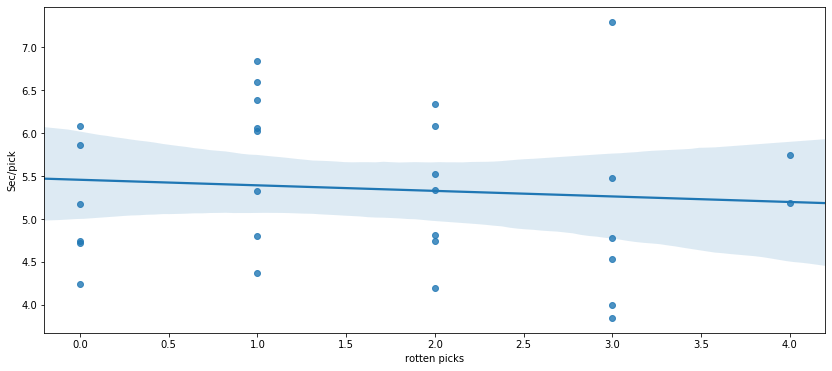

In [5]:
plt.figure(figsize=(14,6))
sns.regplot(x="rotten picks", y = "Sec/pick", data=df)

In [6]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['rotten picks'], df['Sec/pick'])
print("slope: %f    intercept: %f r-value: %f " % (slope, intercept, r_value))
print("R-squared: %f p-value: %f" % (r_value**2, p_value) )                                                                                 

slope: -0.064783    intercept: 5.456981 r-value: -0.089036 
R-squared: 0.007927 p-value: 0.646020


In [7]:
Recipe_without = df[df['rotten picks'] == 0]
Recipe_without

,Red Onion 100g,Capsicum,Carrot,Sec/pick,rotten picks
Recipe,,,,,
A2,0.0,0.0,0.0,4.737439,0
A4,0.0,0.0,0.0,6.081229,0
E4,0.0,0.0,0.0,5.177610,0
F4,0.0,0.0,0.0,5.859453,0
G4,0.0,0.0,0.0,4.722271,0
K4,0.0,0.0,0.0,4.242752,0


In [8]:
Recipe_with = df[df['rotten picks'] != 0]
Recipe_with

,Red Onion 100g,Capsicum,Carrot,Sec/pick,rotten picks
Recipe,,,,,
B2,1.0,0.0,1.0,4.812145,2
C2,0.0,0.0,1.0,6.025132,1
D2,1.0,1.0,1.0,4.776934,3
E2,1.0,0.0,0.0,5.326338,1
F2,1.0,0.0,0.0,6.599354,1
H2,0.0,1.0,0.0,6.390170,1
I2,0.0,0.0,2.0,6.082353,2
J2,0.0,0.0,1.0,4.799260,1
G2,1.0,0.0,0.0,6.058327,1


In [9]:
df['has rooten ingredient?'] = np.where(df['rotten picks'] == 0, 'N', 'Y')
df

,Red Onion 100g,Capsicum,Carrot,Sec/pick,rotten picks,has rooten ingredient?
Recipe,,,,,,
A2,0.0,0.0,0.0,4.737439,0,N
B2,1.0,0.0,1.0,4.812145,2,Y
C2,0.0,0.0,1.0,6.025132,1,Y
D2,1.0,1.0,1.0,4.776934,3,Y
E2,1.0,0.0,0.0,5.326338,1,Y
F2,1.0,0.0,0.0,6.599354,1,Y
H2,0.0,1.0,0.0,6.390170,1,Y
I2,0.0,0.0,2.0,6.082353,2,Y
J2,0.0,0.0,1.0,4.799260,1,Y


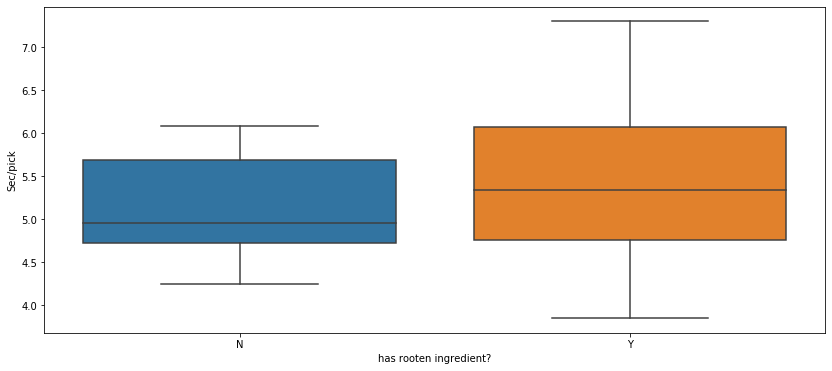

In [10]:
plt.figure(figsize=(14,6))

sns.boxplot(x="has rooten ingredient?", y="Sec/pick", data=df)


In [11]:
stats.ttest_ind(Recipe_with['Sec/pick'], Recipe_without['Sec/pick'], equal_var= False)

Ttest_indResult(statistic=0.7634812763934589, pvalue=0.4625773895612403)